In [1]:
import os
import sys
import numpy as np
import pandas as pd
current_dir = os.getcwd()

# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

# ignore warrnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from scripts.EDA_scripts import ExploratoryDataAnalysis

In [3]:
df = pd.read_csv('../data/data.csv')
# Create an instance of the ExploratoryDataAnalysis class
eda = ExploratoryDataAnalysis(df)
# view top five records from the dataframe
eda.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


### Explanation of variables
- **TransactionId**: Unique transaction identifier on platform
- **BatchId**: Unique number assigned to a batch of transactions for processing
- **AccountId**: Unique number identifying the customer on platform
- **SubscriptionId**: Unique number identifying the customer subscription
- **CustomerId**: Unique identifier attached to Account
- **CurrencyCode**: Country currency
- **CountryCode**: Numerical geographical code of country
- **ProviderId**: Source provider of Item bought.
- **ProductId**: Item name being bought.
- **ProductCategory**: ProductIds are organized into these broader product categories.
- **ChannelId**: Identifies if customer used web,Android, IOS, pay later or checkout.
- **Amount**: Value of the transaction. Positive for debits from customer account and negative for credit into cus...
- **Value**: Absolute value of the amount
- **TransactionStartTime**: Transaction start time
- **PricingStrategy**: Category of Xente's pricing structure for merchants
- **FraudResult**: Fraud status of transaction 1 -yes or 0-No

In [4]:
# List of numerical and categorical columns
numerical_cols = ['Amount', 'Value']
categorical_cols = ['ChannelId', 'ProductCategory', 'CountryCode','ProductId','PricingStrategy', 'FraudResult']

### 1: Dataset Overview

In [5]:
eda.dataset_overview() 

Dataset Overview:
Number of rows: 95662
Number of columns: 16

Column Data Types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

First 5 rows of the dataset:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   Accou

### 2. Summary Statistics
Understand the central tendency (mean, median), dispersion (variance, standard deviation), and shape of numerical columns.

In [6]:
eda.summary_statistics()


Summary Statistics:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


### 3. Distribution of Numerical Features
Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.


Distribution of Numerical Features:


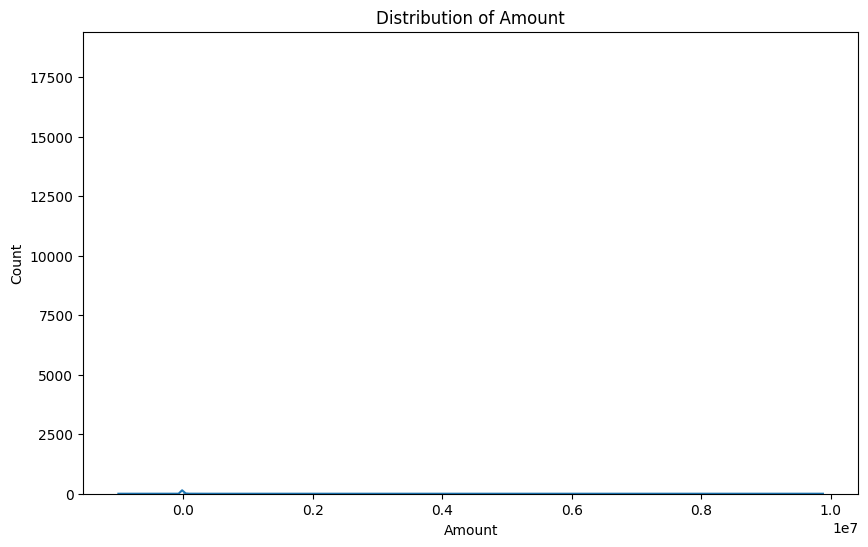

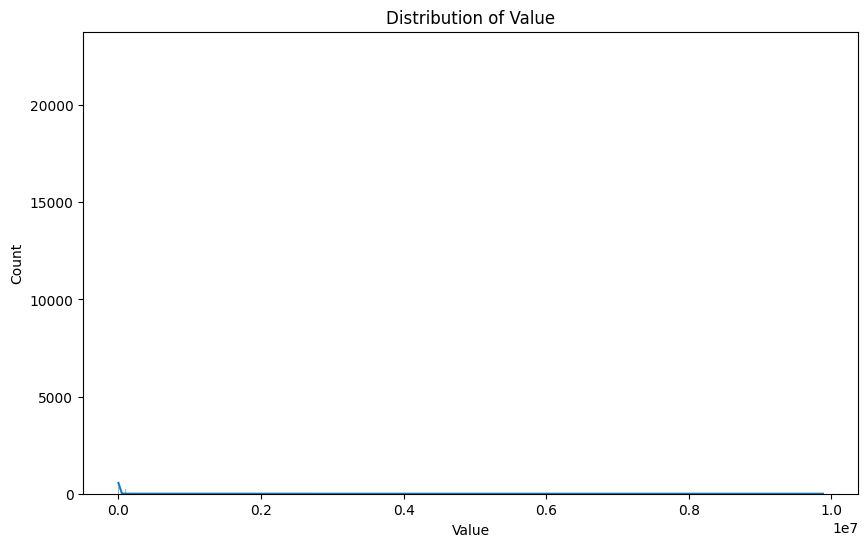

In [9]:
# Histogram for numerical columns like Amount, Value
eda.numerical_distribution(numerical_cols)  #  Numerical Features Distribution

### 4. Distribution of Categorical Features
Understanding the frequency and variability of categorical features like `ChannelId`, `ProductCategory`, `CountryCode`, etc.


Distribution of Categorical Features:


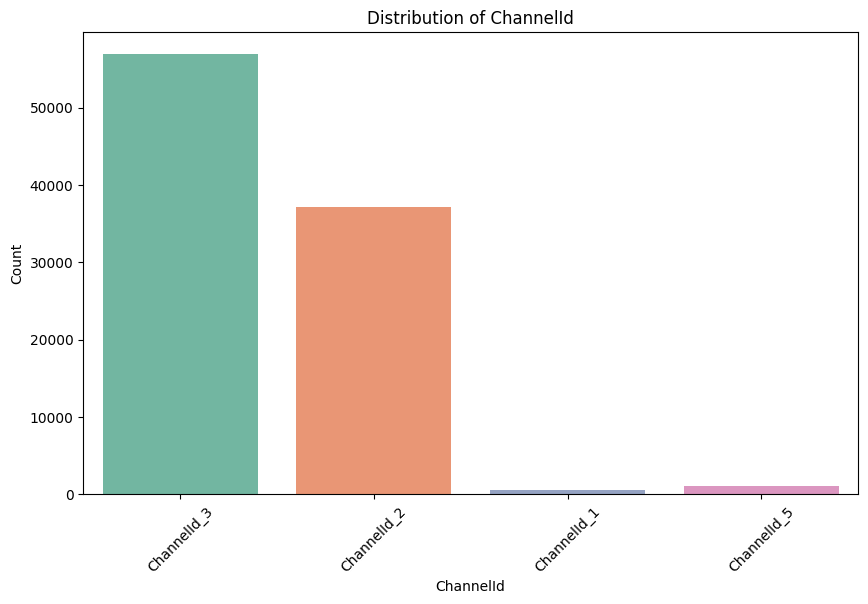

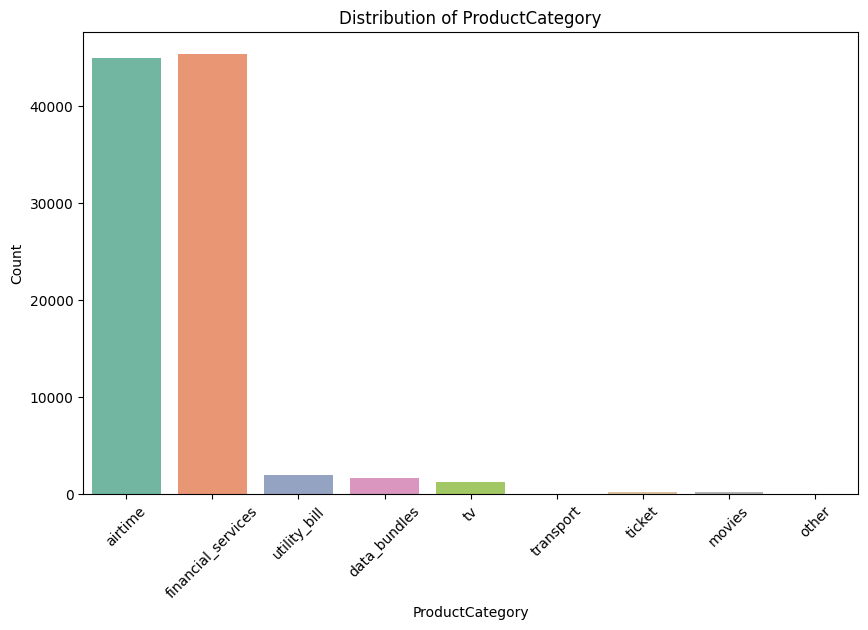

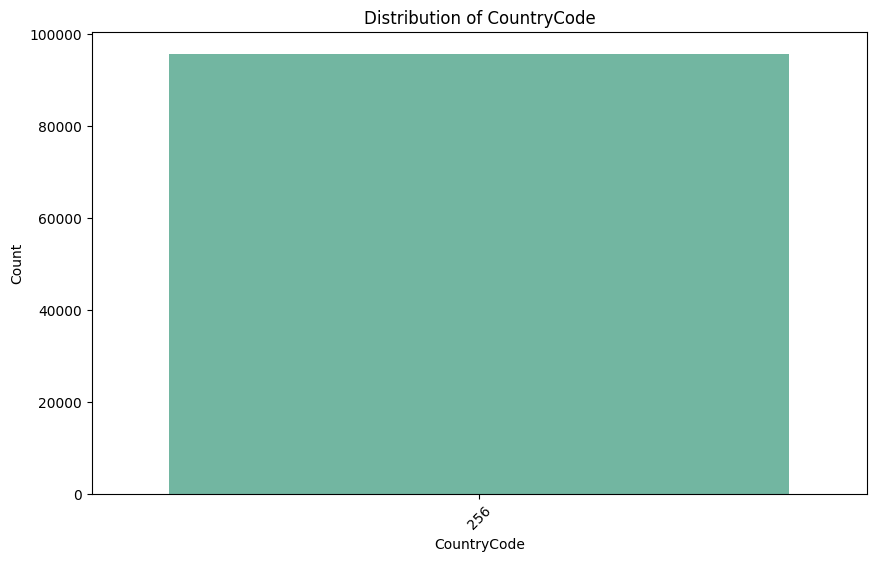

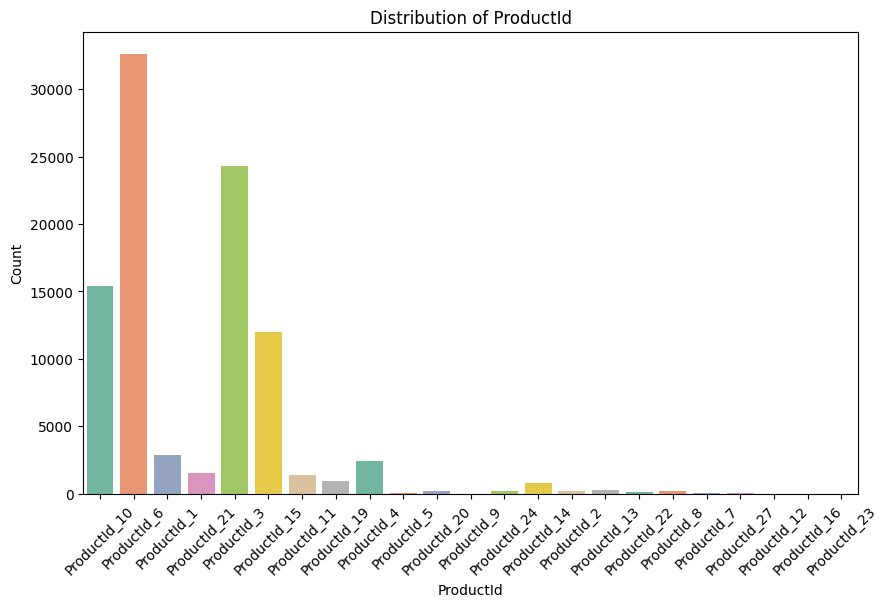

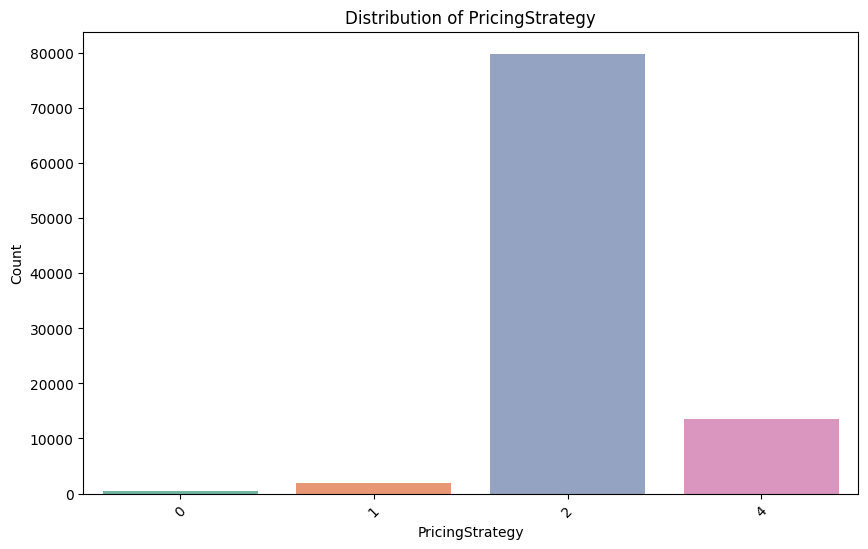

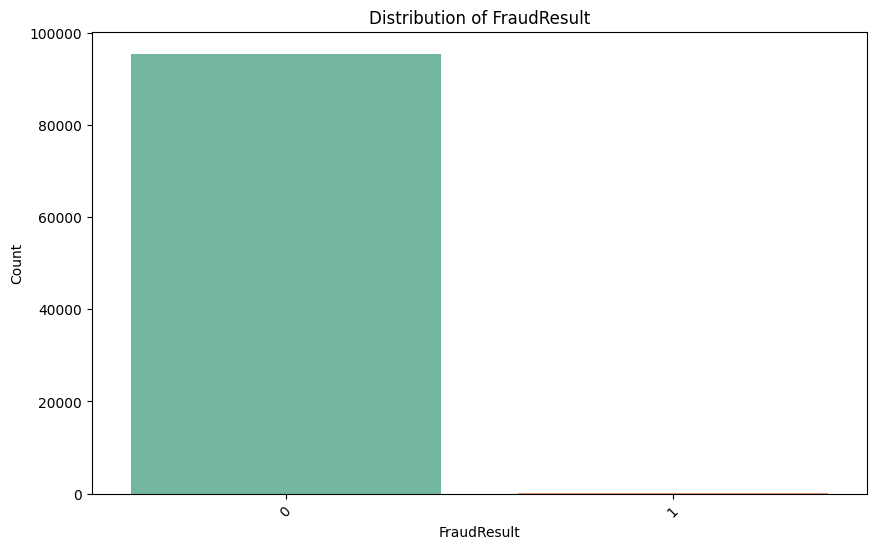

In [11]:
# Count plot for categorical columns
eda.categorical_distribution(categorical_cols)  

### 5. Correlation Analysis
Understanding relationships between numerical features (Amount, Value) can help detect multicollinearity and provide insights for feature selection.


Correlation Analysis:


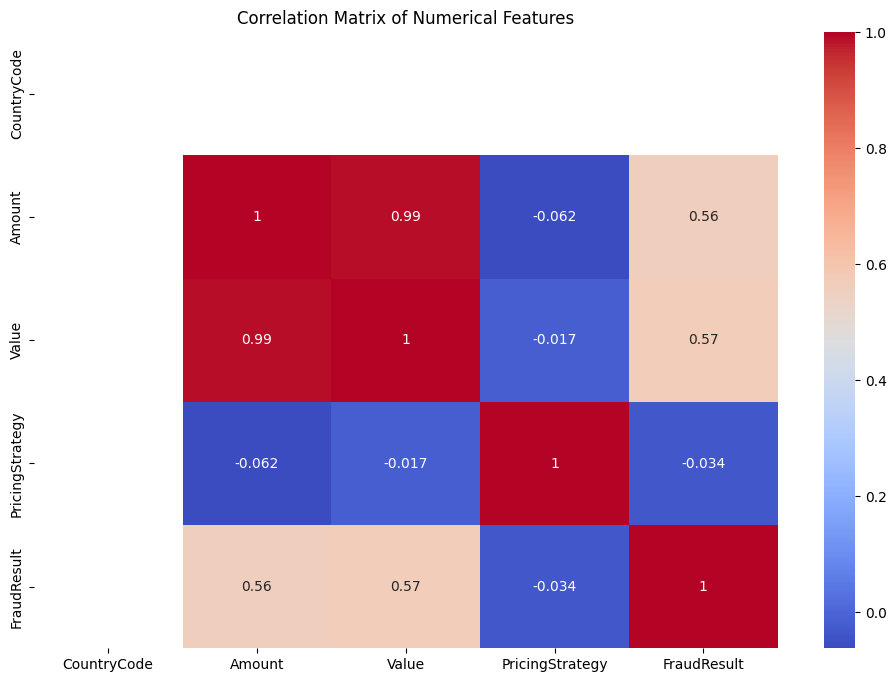

In [5]:
# Correlation matrix
eda.correlation_analysis()

#### Observations from the Correlation Matrix:
- **Strong Positive Correlation**: Amount and Value are highly correlated (0.99), suggesting they increase together.

- **Moderate Positive Correlation**: FraudResult shows a moderate correlation with Amount (0.56) and Value (0.57), indicating potential links to higher amounts and values.

- **Weak Correlations**: PricingStrategy has weak correlations with other features, suggesting limited influence on the dataset.
---

### 6. Identifying Missing Values
Missing values can affect the model's performance. Identifying and deciding on imputation strategies is essential.


Missing Values Analysis:
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


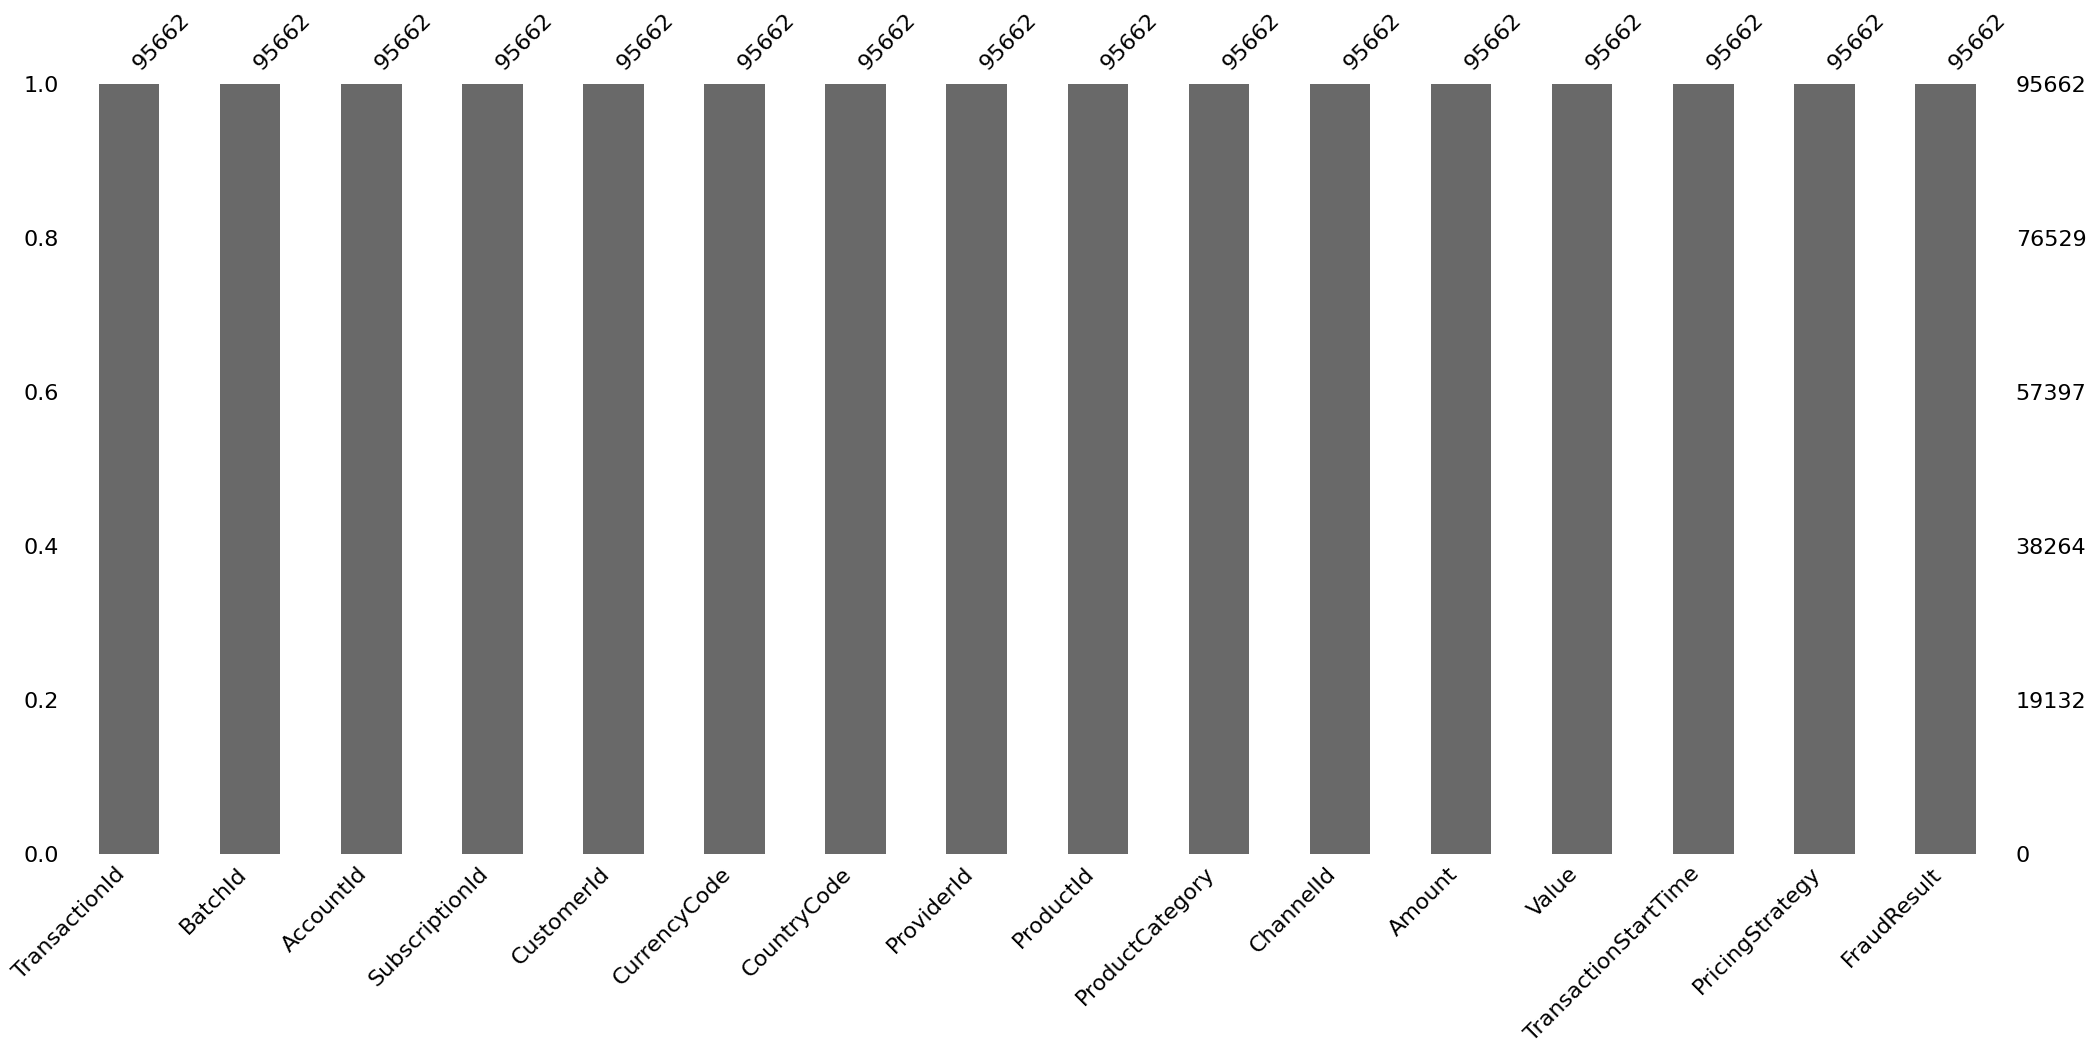

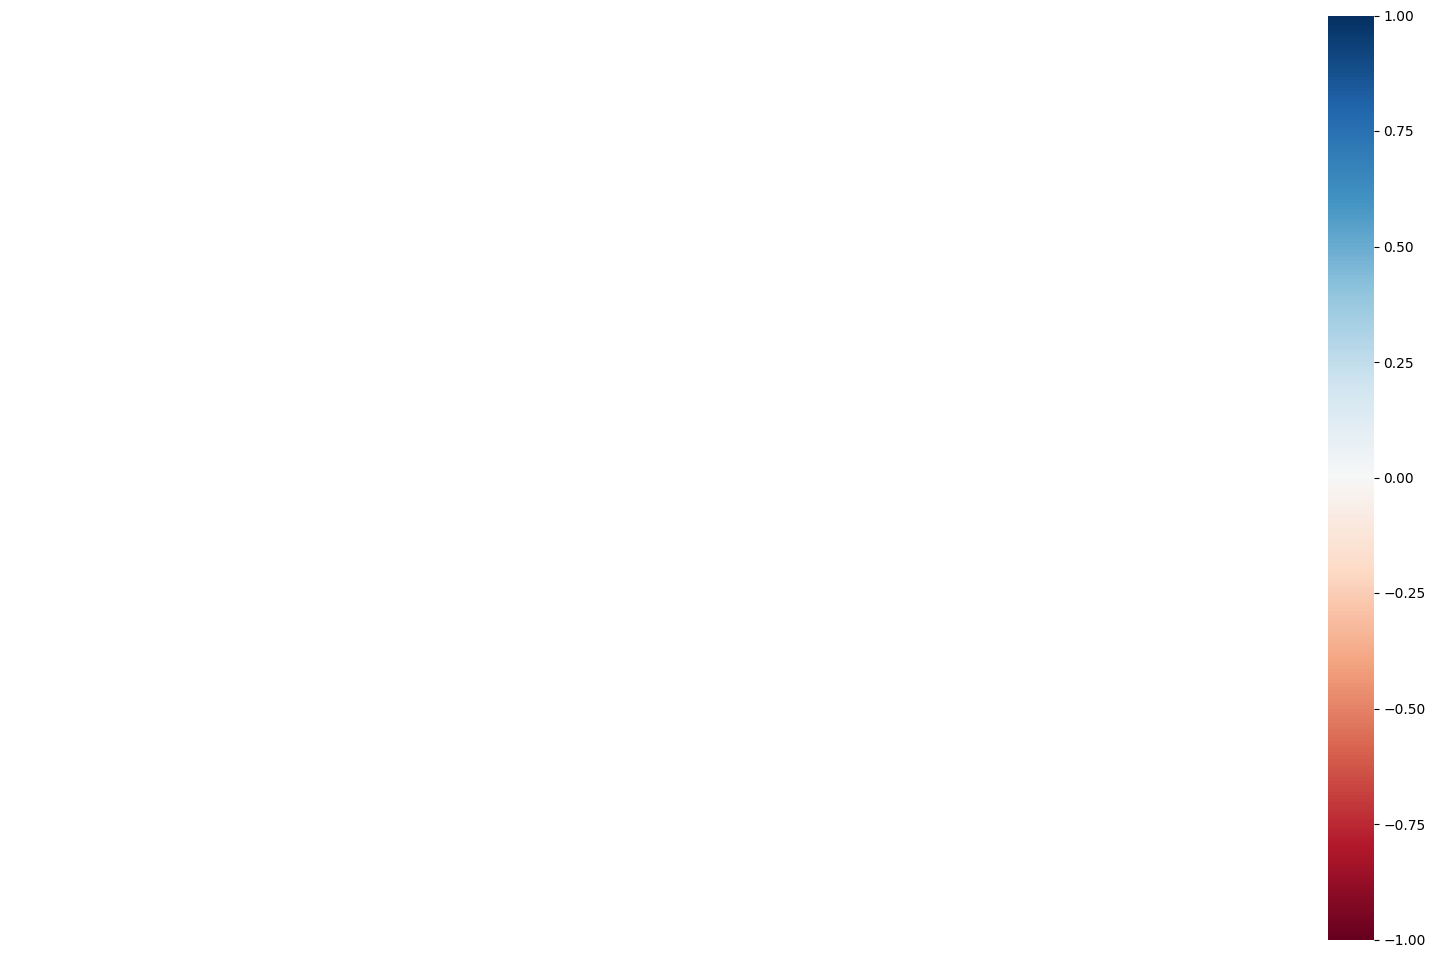

In [13]:
# Check for missing values
eda.missing_values_analysis()      #Missing Values Analysis

### 7. Outlier Detection
Outliers can distort the model’s predictions. You can use box plots to identify them.


Outlier Detection:


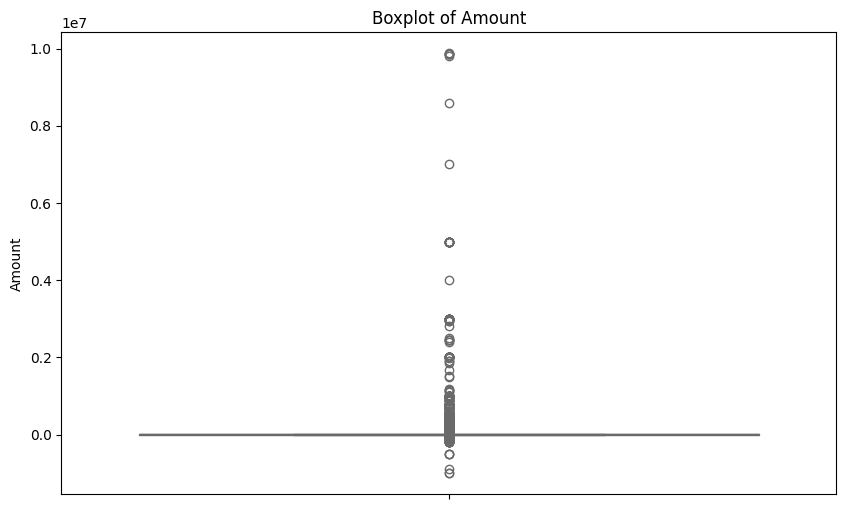

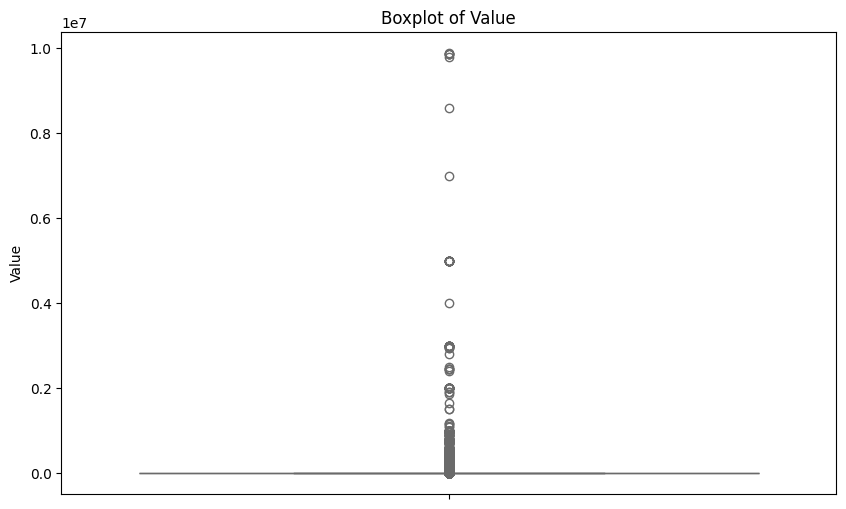

In [5]:
# Boxplot for detecting outliers in numerical columns
eda.outlier_detection(numerical_cols)  #Outlier Detection

For the **Amount** plot:

- Significant number of outliers above the box, indicating high values.
- Most data is tightly clustered near zero, with very short whiskers.
- The distribution is highly skewed to the right due to the extreme outliers.
- 
For the **Value** plot:

- Similarly, many outliers extend upward, suggesting large values.
- The majority of data is concentrated at the lower end.
- The data shows a right skew, with outliers stretching far from the main distribution.

### 8. Conclusion